# Lineáris algebrai függvények a numpy-ban, eredmények vizualizációja (matplotlib)

## Lineáris algebrai egyenletrendszer megoldása

Mivel nagyon sok matematikai probléma megoldása visszavezethető lineáris egyenletrendszerek megoldására, gyakorlatilag minen tudományos programozási tartalmaz, tipikusan több, függvényt, melyek segítségével ezen egyenletrendszereket lehet megoldani.  

A legyegyszerűbb egyenletrendszer alakja:

$$
    \mathbf{A} \mathbf{x} = \mathbf{b}
$$

ahol,
- $\mathbf{A}$ egy $m \times n$-es mátrix,
- $\mathbf{x}$ egy $n$ ismeretlen elemet tartalmazó vektor,
- $\mathbf{b}$ egy $m$ ismeret elemet tartalmazó vektor.

A `linalg` a numpy egy alcsomagja, mely alapvető lineáris algebrai függvényeket tartalmaz. A csomagot elérhetjük a numpy-on keresztül is (`np.linalg`) vagy importálhatjuk külön az alábbi szintaxis segítségével:

In [1]:
import numpy as np
from numpy import linalg as lin, random as rng

A következő parancs a fenti sorral ekvivalens.

In [2]:
lin, rng = np.linalg, np.random

A `random` numpy alcsomag `randn` függvényével generáljunk egy 4 soros és 5 oszlopos mátrixot és egy 4 elemet tartalmazó sorvektort. Az `A` változó az egyenletrendszer bal oldalán található mátrix, a `b` az egyenletrendszer jobb oldalán található vektor.

In [2]:
A, b = rng.randn(4, 5) + 1, rng.rand(4)
print(A, "\n\n", b)

[[ 1.98509365  0.4236864  -0.14303797  2.01854026  0.92466702]
 [ 3.73327256  0.18972013  0.7993613  -0.38455537  2.16417976]
 [ 1.17508207 -1.28687141  1.72792908  2.41832974  1.62017299]
 [ 0.69591302 -0.43375939  1.7014742   2.71927093  0.60968041]] 

 [0.10513836 0.37067451 0.29447037 0.84917699]


A `help` függvény segítségével lehet egy adott függvény dokumentációját kinyomtatni. A lináris algebra csomag <q>igásló</q> függvénye az `lstsq` (least squares) függvény. A nevéhez híven a függvény egy adott egyenletrendszerhez kiszámolja a legkisebb négyzetes értelmeben vett legjobb megoldást.

A dokumentációból kiolvasható, hogy a függvény 4 változóval tér vissza, feltéve, hogy a megoldás keresése során nem következett be hiba. Számunkra az első változó, a megoldás vektor lesz hasznos.

In [6]:
help(lin.lstsq)

Help on function lstsq in module numpy.linalg:

lstsq(a, b, rcond='warn')
    Return the least-squares solution to a linear matrix equation.
    
    Computes the vector x that approximatively solves the equation
    ``a @ x = b``. The equation may be under-, well-, or over-determined
    (i.e., the number of linearly independent rows of `a` can be less than,
    equal to, or greater than its number of linearly independent columns).
    If `a` is square and of full rank, then `x` (but for round-off error)
    is the "exact" solution of the equation. Else, `x` minimizes the
    Euclidean 2-norm :math:`|| b - a x ||`.
    
    Parameters
    ----------
    a : (M, N) array_like
        "Coefficient" matrix.
    b : {(M,), (M, K)} array_like
        Ordinate or "dependent variable" values. If `b` is two-dimensional,
        the least-squares solution is calculated for each of the `K` columns
        of `b`.
    rcond : float, optional
        Cut-off ratio for small singular values of `a`

A `_` karakter segítségével elvethetjük a további három visszatérési értéket. A függvény figyelmeztet minket, hogy a jövőben meg fog változni a függvény argumentumainak viselkedése, számunkra ez most nem lényeges.

In [3]:
x, res, _, _ = lin.lstsq(A, b)

/tmp/ipykernel_4563/4207263585.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x, res, _, _ = lin.lstsq(A, b)


Alternatív módon a 4 visszatérési értékből kiválaszthatjuk a legelsőt. (Ha több visszatérési értékünk van, azt a Python egy tuple-ként kezeli, amit tudunk indexelni.)

In [4]:
x = lin.lstsq(A, b, rcond=None)[0]

A megoldás vektor értékei.

In [5]:
x, res

(array([ 0.12413804,  0.37959198,  0.60552315,  0.02827044, -0.29477362]),
 array([], dtype=float64))

In [6]:
res

array([], dtype=float64)

Az alább definiált root-mean-square függvény segítségével kiszámíthatjuk a legkisebb négyzetes értelemben vett eltérési értéket a $\mathbf{A} \mathbf{x} - \mathbf{b}$ kifejezésnek.

$\mathrm{RMS}(\mathbf{x}) = \sqrt{\left(\sum_i^N x_i^2 \right) N^{-1}}$

In [12]:
def rms(array):
    # gyökvonás
    return np.sqrt(
        # elemek négyzetreemelése és a négyzetősszeg kiszámítása
        np.sum(array**2) /
        # elemszámmal osztás
        array.size
    )

In [7]:
np.sqrt(b)

array([0.32425046, 0.60883045, 0.54265124, 0.921508  ])

In [8]:
2.5**2

6.25

In [9]:
b**2

array([0.01105407, 0.13739959, 0.0867128 , 0.72110155])

Az `@` operátor segítségével tudjuk az $\mathbf{A}$ mátrixot és a $\mathbf{x}$ vektort összeszorozni.

Láthatjuk, hogy az RMS érték, elényészően kicsi, tehát az egyenletrendszer megoldása sikeres volt.

In [12]:
np.dot(A, x), A @ x

(array([0.90150371, 0.53462921, 0.59378221, 0.57631652]),
 array([0.90150371, 0.53462921, 0.59378221, 0.57631652]))

In [13]:
rms((A @ x - b))

4.627779271052808e-16

In [17]:
def try_params(params):
    for p in params:
        A = calc(p)
        try:
            x, res, _, _ = lin.lstsq(A, b)
            return x, res, p
        except lin.LinAlgError:
            continue

## Polinomillesztés, bevezetés a matplotlib-be

A fenti példán keresztül láttuk, hogyan lehet lineáris egyenletrendszert megoldani a numpy segítségével. Az egyenletrndszer együtthatóit random módon generáltuk, a kapott megoldásnak nem volt <q>fizikai</q> értelme.

Most nézzünk meg egy <q>klasszkus</q> példát, ahol a megoldás vektor elemei értelmezhetőek. Illesszünk adatokra egy polinomot.

A polinom alakja legyen a következő:

$$
    p(x,\mathbf{a}) = \sum_{i=0}^n a_i x^i
$$

ahol $a$ az együtthatók vektora, $n$ a polinom foka. $m$ darab $(x_j, y_j)$ koordinátapár áll rendelkezésünkre, $j \in [1,m]$. A koordinátapárokra szeretnénk polinomot illeszteni, ehhez legkisebb négyzetes értelemben minimalizáljuk a 

$$
    \left(\sum_{j=1}^m [p(x_j, \mathbf{a}) - y_j]^2\right)^{1/2}
$$

kifejezés értékét.


A legkisebb négyzetek módszerét alkalmazva, itt nem részletezve a számításokkal, a következő egyenletrendszerre jutunk:

$$
    A_{i,j} a_j = y_i
$$

ahol,
$$
    A_{i,j} = \frac{\partial p(x_i,\mathbf{a})}{\partial a_j} = x_i^j.
$$

Kifejtve:
$$
    \mathbf{A} =
    \begin{bmatrix}
        1 & x_1 & x_1^2 & \dots & x_1^{n-1} \\
        1 & x_2 & x_2^2 & \dots & x_2^{n-1} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        1 & x_m & x_m^2 & \dots & x_m^{n-1}
    \end{bmatrix}
$$

$$
    \mathbf{a} = 
    \begin{bmatrix}
        a_0 \\
        a_1 \\
        \vdots \\
        a_n
    \end{bmatrix}
$$

$$
    \mathbf{b} = 
    \begin{bmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        y_m
    \end{bmatrix}
$$

Tehát elő kell állítanunk az $\mathbf{A}$ mátrixot az $x$ értékek segítségével, majd az egyenletrendszert megoldva megkapjuk az $\mathbf{a}$ együtthatók értékét. Az $\mathbf{A}$ mátrixot az irodalomban szokás alak- vagy tervmátrixnak (design matrix) nevezni. Jelen esetben ez egy speciális ún. [Vandermonde-mátrix](https://en.wikipedia.org/wiki/Vandermonde_matrix).

Állítsunk elő teszt adatsorokat:

In [19]:
# x értékek vektora
x = np.linspace(0.0, 10.0, 25)

# együtthatók vektora
a = np.array([2.0, 3.5, 0.2])

# y értékek vektora
y = a[0] + a[1] * x + a[2] * x**2

# zajos y értékek vektora
y_noise = y + rng.rand(y.shape[0])

In [21]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [20]:
np.empty((2, 3))

array([[4.65873194e-310, 0.00000000e+000, 6.90819419e-310],
       [4.24438873e+175, 3.44210870e+175, 6.01346930e-154]])

In [23]:
def polyfit(x, # x értékek vektora
            y, # y értékek vektora
            deg # illesztett polinom foka
    ):
    assert x.shape == y.shape
    
    # alakmátrix, 
    design = np.empty((x.size, deg + 1))
    
    # első oszlop értéke mindenhol 1.0
    design[:,0] = 1.0
    
    # második oszlop értéke mindenhol az x vektor értékei
    design[:,1] = x
    
    # további oszlopok értékei az x vektor elemeinek különböző hatványai
    for ii in range(2, deg + 1):
        design[:,ii] = x**ii
    
    # egyenletrendszer megoldása
    return lin.lstsq(design, y, rcond=None)[0]

In [22]:
def assert_lt_5(a):
    assert a < 5

assert_lt_5(3)
assert_lt_5(10)

AssertionError: 

Függvény próbája.

In [24]:
p = polyfit(x, y, 2)
p, a

(array([2. , 3.5, 0.2]), array([2. , 3.5, 0.2]))

A kapott `p` vektor tartalmazza a polinom együtthatók értékei. Látjuk, hogy a zaj nélküli adatok esetén visszakapjuk az eredeti együtthatókat.

In [25]:
p = polyfit(x, y_noise, 2)
p, a

(array([2.5419831 , 3.45858535, 0.20458282]), array([2. , 3.5, 0.2]))

Zajos adatokaesetén természetesen nem kapjuk vissza tőkéletesen az eredeti értékeket.

In [26]:
rms(p - a)

0.3138374602628475

A különbségek RMS értéke nem elhanyagolhatóak, de továbbra is kicsik.

## Rövid kitérő: indexelés Pythonban, numpy-ban

Matlabtól eltérően a Python-ban az indexek 0-tól kezdődnek. Matlabhoz hasonlóan a Pythonban is lehetséges tőbb elem kiválasztása:

Első elemet kivéve minden elem kiválasztása. 

In [27]:
p

array([2.5419831 , 3.45858535, 0.20458282])

In [28]:
p[1:]

array([3.45858535, 0.20458282])

A második elemtől a harmadik elemig (a harmadik elem nem kerül kiválasztásra) minden elem kiválasztása. Jelen esetben ez csak a második elem lesz.

In [29]:
p[1:2]

array([3.45858535])

Harmadik elemtől az első elemig az elemek kiválasztása, fordított sorrendben (2. és 1. elemet kapjuk meg; `-1` jelzi, hogy visszafele lépünk egyesével).

In [30]:
p[2:0:-1]

array([0.20458282, 3.45858535])

Minden második elem kiválasztása (0. és 2. elemet kapjuk meg; `2` jelzi, hogy kettesével lépünk).

In [24]:
p[::2]

array([2.69339634, 0.20700833])

Összes elem kiválasztása fordított sorrendben.

In [31]:
p

array([2.5419831 , 3.45858535, 0.20458282])

In [32]:
p[::-1]

array([0.20458282, 3.45858535, 2.5419831 ])

A polinom kiértékeléséhez felhasználhatjuk a numpy `polyval` függvényét. A függvény első argumentuma a polinom együtthatók vektora, a második argumentum az `x` értékek vektora, ahol a polinomot szeretnénk kiértékelni. **Figyelem:** a polinom együtthatókat fordított sorrendben (legnagyobb hatvány együtthatótól a legkisebb hatvány együtthatójáig) kell megadnunk.

Zajos adatosrra illesztett polinom együtthatókkal kiértékelt $y$ értékek és RMS eltérése az eredeti értékektől.

In [33]:
yy = np.polyval(p[::-1], x)

rms(yy - y)

0.4924179879882755

In [34]:
y

array([ 2.        ,  3.49305556,  5.05555556,  6.6875    ,  8.38888889,
       10.15972222, 12.        , 13.90972222, 15.88888889, 17.9375    ,
       20.05555556, 22.24305556, 24.5       , 26.82638889, 29.22222222,
       31.6875    , 34.22222222, 36.82638889, 39.5       , 42.24305556,
       45.05555556, 47.9375    , 50.88888889, 53.90972222, 57.        ])

## Eredmények vizualizációja, matplotlib bevezető

A kapott polinomot kirajzolhatjuk `matplotlib` csomag segítségével. A csomagot úgy írták meg, hogy a függvények nevei és viselkedése hasonlítson a Matlabban megszokott rajzolási függvények neveihez és viselkedéséhez.

In [35]:
# plot csomag importálása
import matplotlib.pyplot as plt

# parancs, mellyel a notebook-ba közvetlenül rajzolhatjuk
# régebbi ipython verziónál szükséges lehet
# %matplotlib inline

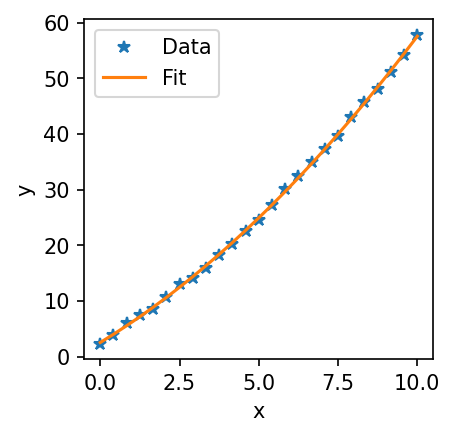

In [36]:
# üres ábra létrehozása
f = plt.figure(
    # ábra mérete inch-ben
    figsize=(3, 3),
    # dpi felbontása
    dpi=150
)

# zajos adatok kirajzolása csillag szimbólumokkal
plt.plot(x, y_noise, "*", label="Data")

# illesztett polinom kirajzolása folytonos vonallal
plt.plot(x, yy, "-", label="Fit")

# jelmagyarázat hozzáadása
plt.legend()

# tengelyek feliratozása
plt.xlabel("x")
plt.ylabel("y")

# ábra kimentése png fájlba, más formátumok is támogatottak
f.savefig("assets/fit.png")

"Változó" vagy objektum orientált módon törtánő létrehozása az ábrának.

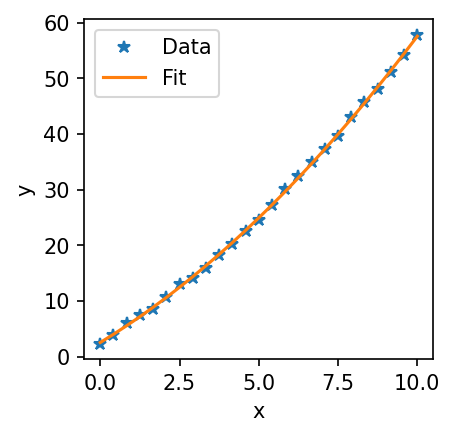

In [37]:
f, ax = plt.subplots(
    # ábra mérete inch-ben
    figsize=(3, 3),
    # dpi felbontása
    dpi=150
)

# zajos adatok kirajzolása csillag szimbólumokkal
ax.plot(x, y_noise, "*", label="Data")

# illesztett polinom kirajzolása folytonos vonallal
ax.plot(x, yy, "-", label="Fit")

# jelmagyarázat hozzáadása
ax.legend()

# tengelyek feliratozása
ax.set_xlabel("x")
ax.set_ylabel("y");

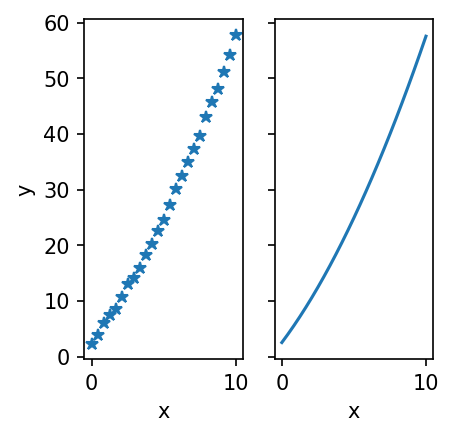

In [38]:
f, (one, two) = plt.subplots(
    # ábra mérete inch-ben
    figsize=(3, 3),
    # dpi felbontása
    dpi=150,
    ncols=2,
    nrows=1,
    sharex=True,
    sharey=True
)

# zajos adatok kirajzolása csillag szimbólumokkal
one.plot(x, y_noise, "*")

# illesztett polinom kirajzolása folytonos vonallal
two.plot(x, yy, "-")

# tengelyek feliratozása
# ax.set_xlabel("x")
one.set_ylabel("y");
one.set_xlabel("x");
two.set_xlabel("x");
f.savefig("assets/fit_two.svg")

Látható, hogy a polinomunk jól illeszkedik a zajos adatsorra, az illesztés sikeres volt.

A következő fejezetben a scipy csomag néhány függvényével ismerkedünk meg.